<a href="https://colab.research.google.com/github/AngelB26/ICTAK/blob/main/UnSupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv('/content/Wholesale customers data.csv')

In [4]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
data.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [8]:
data.shape

(440, 8)

In [9]:
data.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [10]:
data.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [ ]:
#outlier detection

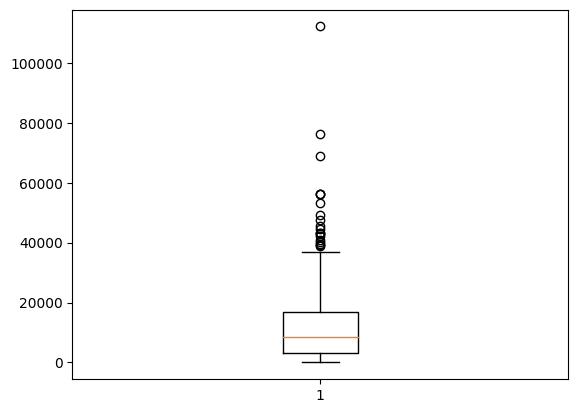

In [11]:
plt.boxplot(data["Fresh"])
plt.show()

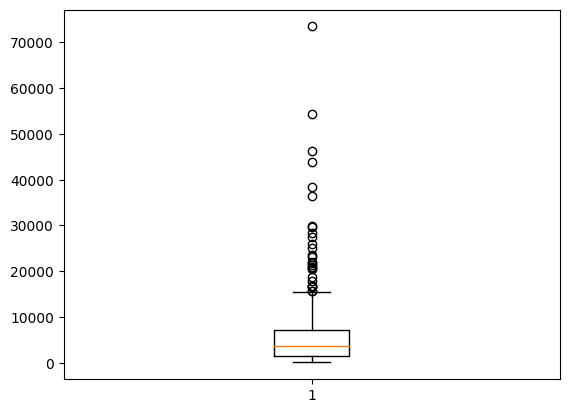

In [12]:
plt.boxplot(data["Milk"])
plt.show()

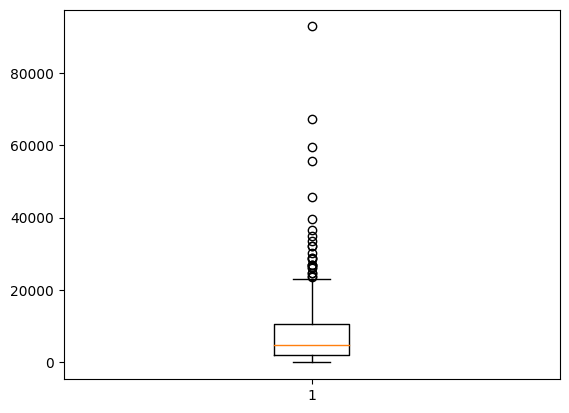

In [13]:
plt.boxplot(data["Grocery"])
plt.show()

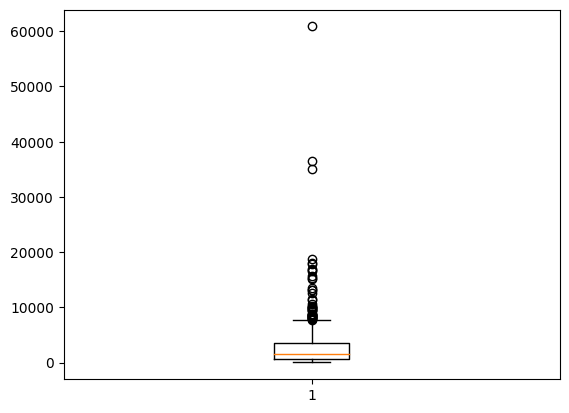

In [14]:
plt.boxplot(data["Frozen"])
plt.show()

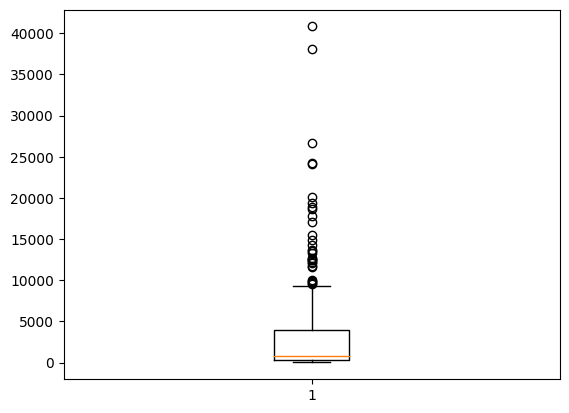

In [15]:
plt.boxplot(data["Detergents_Paper"])
plt.show()

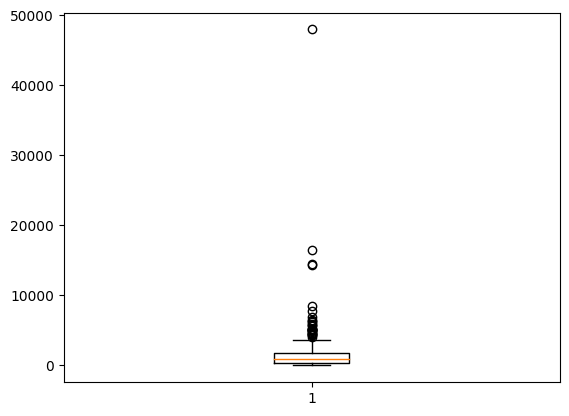

In [16]:
plt.boxplot(data["Delicassen"])
plt.show()

In [17]:
#outlier handling

In [18]:
Q1a = data['Fresh'].quantile(0.25)
Q2a = data['Fresh'].quantile(0.5)
Q3a = data['Fresh'].quantile(0.75)
iqr1 = Q3a - Q1a
low_1 = Q1a - (1.5*iqr1)
up_1 = Q3a + (1.5*iqr1)
print(low_1,up_1)

-17581.25 37642.75


In [20]:
data[(data['Fresh'] >= 1)].index
print(data['Fresh'].skew())

2.561322751927935


In [21]:
#Flooring and Capping method for treating outliers
print(data['Fresh'].quantile(0.10))
print(data['Fresh'].quantile(0.90))

915.6000000000001
27090.500000000004


In [22]:
data["Fresh"] = np.where(data["Fresh"] <915.6000000000001,915.6000000000001,data['Fresh'])
data["Fresh"] = np.where(data["Fresh"] >27090.500000000004, 27090.500000000004,data['Fresh'])
print(data['Fresh'].skew())

0.6810613617028582


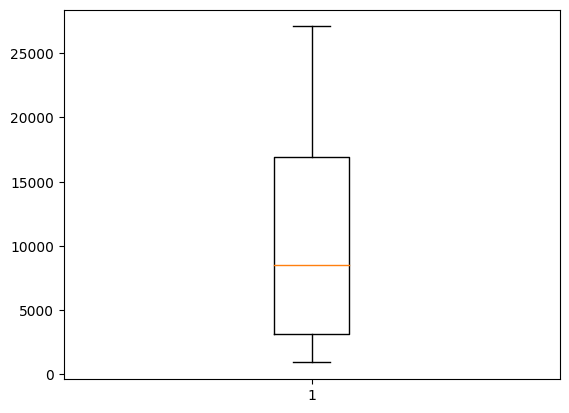

In [23]:
plt.boxplot(data["Fresh"])
plt.show()

In [24]:
Q1b = data['Milk'].quantile(0.25)
Q2b = data['Milk'].quantile(0.5)
Q3b = data['Milk'].quantile(0.75)
iqr2 = Q3b - Q1b
low_2 = Q1b - (1.5 *iqr2)
up_2 = Q3b + (1.5*iqr2)
print(low_2,up_2)

-6952.875 15676.125


In [26]:
data[(data['Milk'] > 1)].index
print(data['Milk'].skew())

4.053754849210881


In [27]:
#Flooring and Capping method for treating outliers
print(data['Milk'].quantile(0.10))
print(data['Milk'].quantile(0.90))

889.8000000000001
12229.900000000001


In [28]:
data["Milk"] = np.where(data["Milk"] <889.8000000000001, 889.8000000000001,data['Milk'])
data["Milk"] = np.where(data["Milk"] >12229.900000000001,12229.900000000001,data['Milk'])
print(data['Milk'].skew())

0.7956068295411347


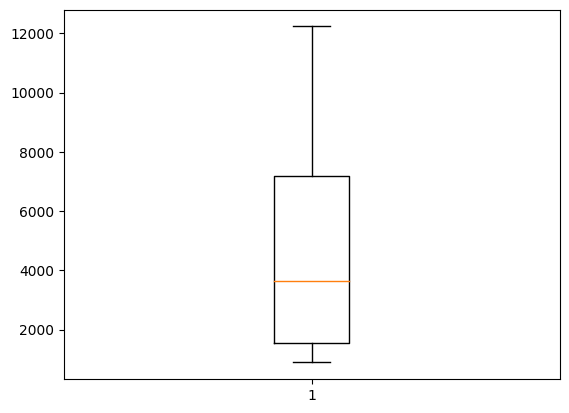

In [29]:
plt.boxplot(data["Milk"])
plt.show()

In [30]:
Q1c = data['Grocery'].quantile(0.25)
Q2c = data['Grocery'].quantile(0.5)
Q3c = data['Grocery'].quantile(0.75)
iqr3 = Q3c - Q1c
low_3 = Q1c -(1.5 *iqr3)
up_3 = Q3c +(1.5 *iqr3)
print(low_3,up_3)

-10601.125 23409.875


In [31]:
data[(data['Grocery'] < low_3) | (data['Grocery'] > up_3)].index
print(data['Grocery'].skew())

3.5874286903915453


In [32]:
print(data['Grocery'].quantile(0.10))
print(data['Grocery'].quantile(0.90))

1381.9
18910.100000000006


In [33]:
data['Grocery'] = np.where(data['Grocery'] < 1381.9,1381.9,data['Grocery'])
data['Grocery'] = np.where(data['Grocery'] > 18910.100000000006,18910.100000000006,data['Grocery'])
print(data['Grocery'].skew())

0.9403441101490471


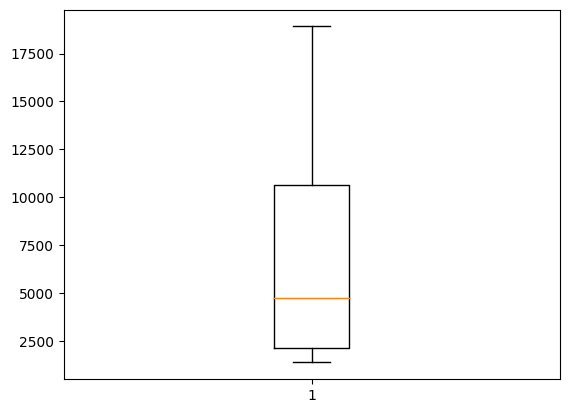

In [34]:
plt.boxplot(data["Grocery"])
plt.show()

In [36]:
Q1d = data['Frozen'].quantile(0.25)
Q2d = data['Frozen'].quantile(0.5)
Q3d = data['Frozen'].quantile(0.75)
iqr4 = Q3d - Q1d
low_4 = Q1d - (1.5 * iqr4)
up_4 = Q3d + (1.5 * iqr4)
print(low_4, up_4)

-3475.75 7772.25


In [37]:
data[(data['Frozen'] < low_4) | (data['Frozen'] > up_4)].index
print(data['Frozen'].skew())

5.9079856924559575


In [38]:
print(data['Frozen'].quantile(0.10))
print(data['Frozen'].quantile(0.90))

281.30000000000007
7545.300000000004


In [39]:
data['Frozen'] = np.where(data['Frozen'] <281.30000000000007,281.30000000000007,data['Frozen'])
data['Frozen'] = np.where(data['Frozen'] > 7545.300000000004,7545.300000000004,data['Frozen'])
print(data['Frozen'].skew())

1.1024124815127851


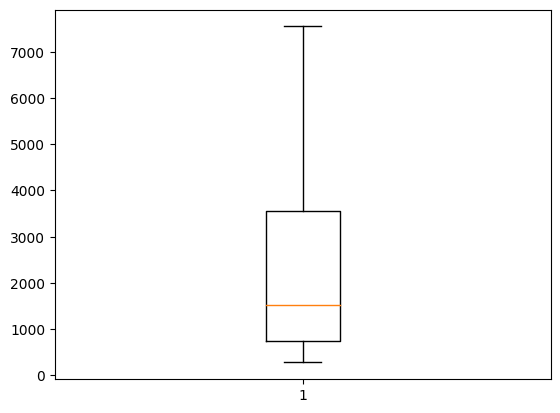

In [40]:
plt.boxplot(data["Frozen"])
plt.show()

In [41]:
Q1e = data['Detergents_Paper'].quantile(0.25)
Q2e = data['Detergents_Paper'].quantile(0.5)
Q3e = data['Detergents_Paper'].quantile(0.75)
iqr5 = Q3e - Q1e
low_5 = Q1e -(1.5 *iqr5)
up_5= Q3e +(1.5 *iqr5)
print(low_5,up_5)

-5241.125 9419.875


In [42]:
data[(data['Detergents_Paper'] < low_5) | (data['Detergents_Paper'] > up_5)].index
print(data['Detergents_Paper'].skew())

3.6318506306913645


In [43]:
print(data['Detergents_Paper'].quantile(0.10))
print(data['Detergents_Paper'].quantile(0.90))

99.60000000000002
7438.300000000003


In [44]:
data['Detergents_Paper'] = np.where(data['Detergents_Paper'] <99.60000000000002,99.60000000000002,data['Detergents_Paper'])
data['Detergents_Paper'] = np.where(data['Detergents_Paper'] > 7438.300000000003,7438.300000000003,data['Detergents_Paper'])
print(data['Detergents_Paper'].skew())

1.0320840429934701


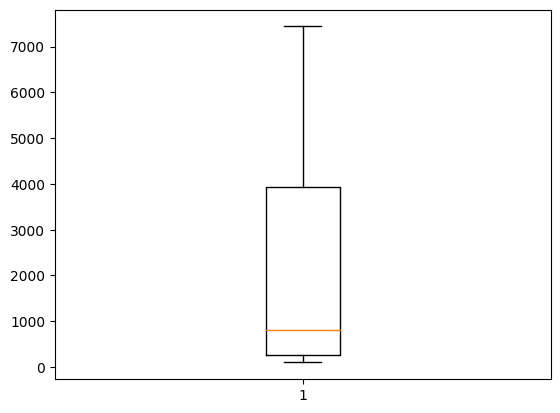

In [45]:
plt.boxplot(data["Detergents_Paper"])
plt.show()

In [46]:
Q1f = data['Delicassen'].quantile(0.25)
Q2f = data['Delicassen'].quantile(0.5)
Q3f = data['Delicassen'].quantile(0.75)
iqr6 = Q3f - Q1f
low_6 = Q1f -(1.5 *iqr6)
up_6= Q3f +(1.5 *iqr6)
print(low_6,up_6)

-1709.75 3938.25


In [47]:
data[(data['Delicassen'] < low_6) | (data['Delicassen'] > up_6)].index
print(data['Delicassen'].skew())

11.151586478906117


In [48]:
print(data['Delicassen'].quantile(0.10))
print(data['Delicassen'].quantile(0.90))

180.8
2945.9000000000005


In [49]:
data['Delicassen'] = np.where(data['Delicassen'] <180.8,180.8,data['Delicassen'])
data['Delicassen'] = np.where(data['Delicassen'] > 2945.9000000000005,2945.9000000000005,data['Delicassen'])
print(data['Delicassen'].skew())

0.7022473937820302


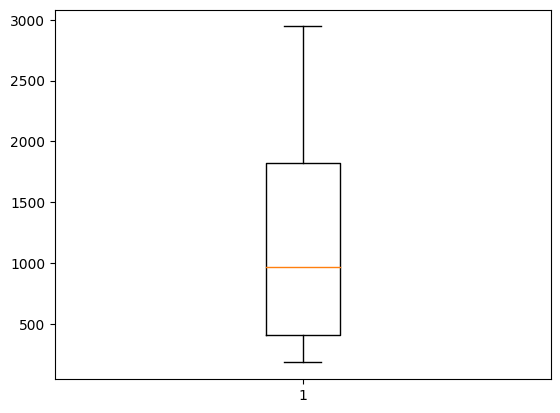

In [50]:
plt.boxplot(data["Delicassen"])
plt.show()

In [51]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669.0,9656.0,7561.0,281.3,2674.0,1338.0
1,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,2,3,6353.0,8808.0,7684.0,2405.0,3516.0,2945.9
3,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,2,3,22615.0,5410.0,7198.0,3915.0,1777.0,2945.9


In [52]:
x=data.drop(['Region','Channel'],axis=1)

In [53]:
x.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669.0,9656.0,7561.0,281.3,2674.0,1338.0
1,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0
2,6353.0,8808.0,7684.0,2405.0,3516.0,2945.9
3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0
4,22615.0,5410.0,7198.0,3915.0,1777.0,2945.9


In [ ]:
#scaling

In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
mn = MinMaxScaler()

In [56]:
x.loc[:,['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']] = mn.fit_transform(x[['Fresh', 'Milk', 'Grocery', 'Frozen','Detergents_Paper', 'Delicassen']])

In [57]:
x.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.449033,0.773027,0.352523,0.000000,0.350798,0.418502
1,0.234629,0.786607,0.467025,0.203841,0.435145,0.576905
2,0.207733,0.698248,0.359541,0.292360,0.465532,1.000000
3,0.471803,0.027002,0.161973,0.842883,0.055514,0.581245
4,0.829016,0.398603,0.331814,0.500234,0.228569,1.000000


In [ ]:
#KMeans

In [58]:
from sklearn.cluster import KMeans

In [59]:
wcss=[]
for i in range(1,11):
 km=KMeans(n_clusters=i,n_init=10)
 km.fit(x)
 css=km.inertia_
 wcss.append(css)


In [60]:
wcss

[290.94761362918797,
 182.81268847217325,
 143.72257725984787,
 125.36223334978027,
 111.84420011537676,
 101.07526107023781,
 91.53836430413429,
 85.02186105779387,
 78.98485719643969,
 75.39222592643921]

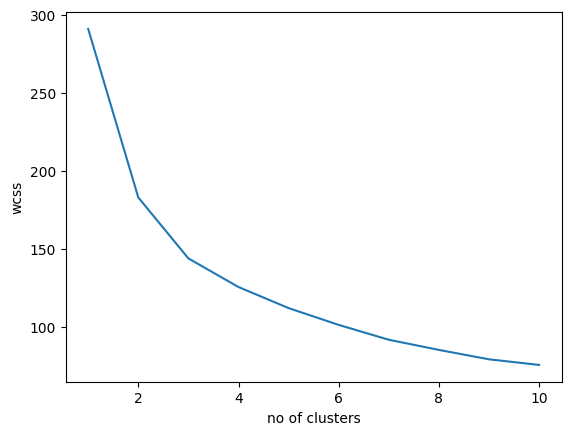

In [61]:
#elbow method
plt.plot(range(1,11),wcss)
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()


In [ ]:
#from elbow method 3 is the optimum no of clusters

In [62]:
km=KMeans(n_clusters=3,n_init=10)

In [63]:
km.fit(x)

KMeans(n_clusters=3, n_init=10)

In [64]:
y_km=km.predict(x)


In [65]:
y_km

array([1, 1, 1, 0, 0, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 2,
       0, 1, 1, 2, 2, 2, 1, 2, 0, 2, 2, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1,
       2, 1, 0, 2, 0, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 1, 1, 2, 2, 1, 1, 0,
       2, 0, 2, 0, 1, 0, 1, 2, 2, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1,
       2, 1, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 0, 2, 2,
       2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 1, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 1,
       0, 0, 2, 0, 0, 0, 1, 0, 2, 2, 2, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1,
       2, 2, 1, 1, 0, 2, 2, 1, 2, 2, 2, 1, 0, 1, 2, 1, 1, 1, 1, 2, 1, 2,
       2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       1, 0, 1, 0, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 1, 2, 0, 0, 0, 0, 2,
       2, 0, 2, 2, 2, 2, 2, 1, 0, 2, 2, 2, 1, 2, 0,

In [66]:
pd.Series(y_km).value_counts()

2    210
1    121
0    109
dtype: int64

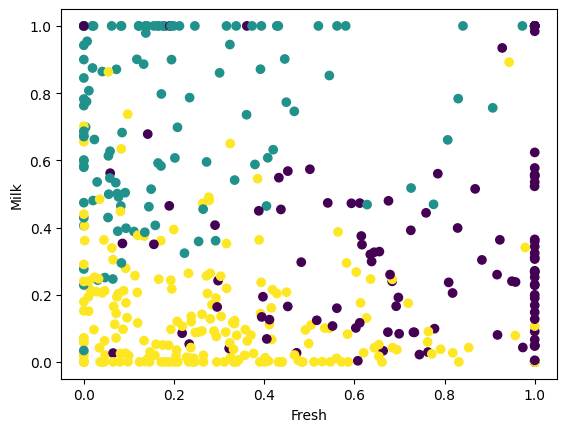

In [67]:
plt.scatter(x['Fresh'],x['Milk'],c=y_km)
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.show()


In [68]:
data['Cluster']=y_km

In [69]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669.0,9656.0,7561.0,281.3,2674.0,1338.0,1
1,2,3,7057.0,9810.0,9568.0,1762.0,3293.0,1776.0,1
2,2,3,6353.0,8808.0,7684.0,2405.0,3516.0,2945.9,1
3,1,3,13265.0,1196.0,4221.0,6404.0,507.0,1788.0,0
4,2,3,22615.0,5410.0,7198.0,3915.0,1777.0,2945.9,0


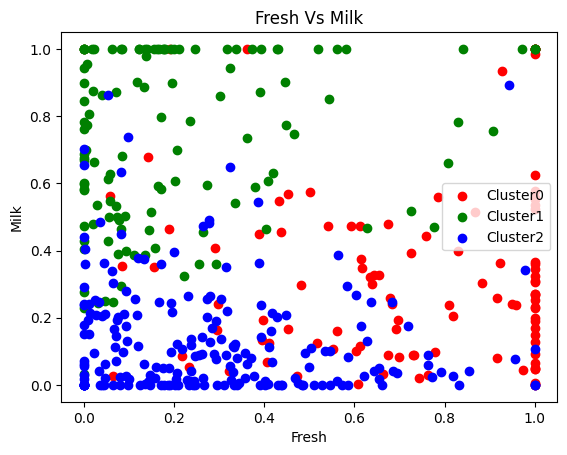

In [70]:
colors=['r','g','b','c','m']
for i in range(max(y_km)+1):
  cluster_data=x[y_km==i]
  plt.scatter(cluster_data['Fresh'],
              cluster_data['Milk'],
              c=colors[i],
              label=f'Cluster{i}')
plt.xlabel('Fresh')
plt.ylabel('Milk')
plt.title('Fresh Vs Milk')
plt.legend()


In [ ]:
#agglomerative hierarchial clustering


In [71]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster

In [72]:
mergings=linkage(x,method='ward')

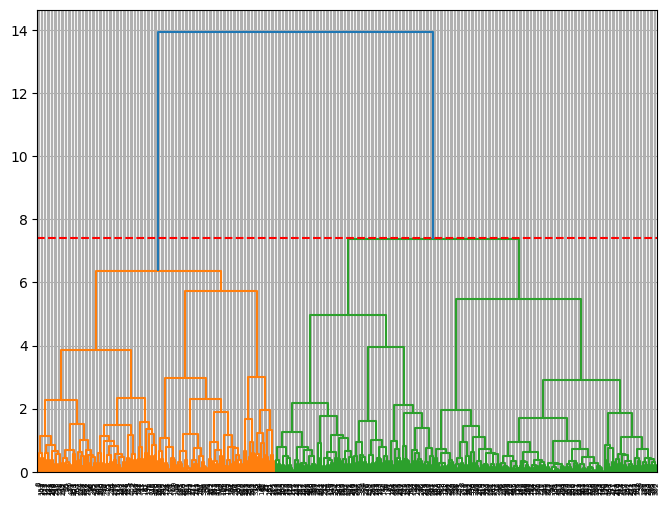

In [73]:
plt.figure(figsize=(8,6))
dendrogram(mergings)
plt.axhline(7.4,color='r',linestyle='--')
plt.grid()
plt.show()

In [74]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

In [75]:
y_hc

array([1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,

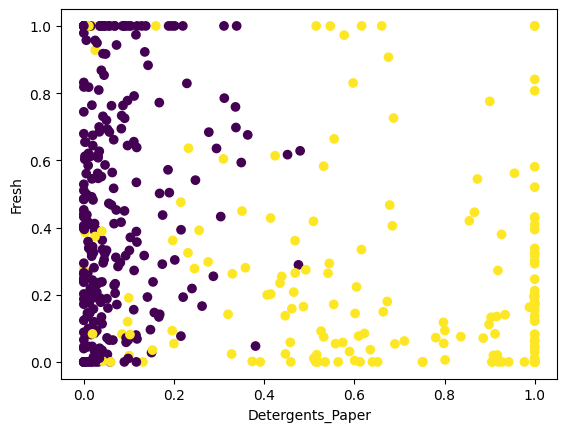

In [77]:
plt.scatter(x['Detergents_Paper'],x['Fresh'],c = y_hc)
plt.xlabel('Detergents_Paper')
plt.ylabel('Fresh')
plt.show()

In [78]:
#silhoutte score for agglomerative hc
from sklearn.metrics import silhouette_score
silhouette=silhouette_score(x,y_hc)

In [79]:
silhouette


0.31572615803292053

In [80]:
silhouette=silhouette_score(x,y_km)

In [81]:
silhouette

0.31638367283697816

In [ ]:
#PCA

In [83]:
from sklearn.decomposition import PCA

In [84]:
pca=PCA()


In [85]:
pc_array=pca.fit_transform(x)

In [86]:
pc_array.shape

(440, 6)

In [87]:
pc_array = pd.DataFrame(pc_array,columns = ['pc1','pc2','pc3','pc4','pc5','pc6'])


In [88]:
pc_array

,pc1,pc2,pc3,pc4,pc5,pc6
0,0.318484,-0.038722,-0.264978,-0.021079,0.328995,-0.081201
1,0.470558,0.035474,-0.017619,0.163407,0.241202,-0.042984
2,0.458342,0.284575,-0.047053,0.504353,0.108591,-0.147648
3,-0.435660,0.443555,0.287221,0.127963,-0.194096,0.042985
4,0.037512,0.744492,-0.240041,0.178762,-0.061051,-0.024128
...,...,...,...,...,...,...
435,0.350490,1.104259,0.185607,-0.278981,0.401009,0.379981
436,-0.541128,0.724317,-0.258892,0.032045,-0.144974,-0.089841
437,1.203039,0.119098,-0.251200,-0.174498,0.013867,-0.018359
438,-0.347944,0.047787,-0.283895,0.401097,-0.033144,-0.004565


In [89]:
pc_array.corr().round()

,pc1,pc2,pc3,pc4,pc5,pc6
pc1,1.0,0.0,0.0,0.0,0.0,-0.0
pc2,0.0,1.0,0.0,0.0,0.0,-0.0
pc3,0.0,0.0,1.0,0.0,0.0,0.0
pc4,0.0,0.0,0.0,1.0,-0.0,-0.0
pc5,0.0,0.0,0.0,-0.0,1.0,0.0
pc6,-0.0,-0.0,0.0,-0.0,0.0,1.0


In [ ]:
#no correlation

In [90]:
pca.explained_variance_

array([0.31187437, 0.17028505, 0.06956207, 0.06664096, 0.03184904,
       0.01253933])

In [91]:
pca.explained_variance_ratio_*100

array([47.05756005, 25.69367603, 10.49596133, 10.05520654,  4.805583  ,
        1.89201306])

In [93]:
47.05756005+ 25.69367603+ 10.49596133+ 10.05520654+  4.805583  +1.89201306

100.00000001

In [94]:
pca1=PCA(n_components=5)

In [95]:
pc_array1=pca1.fit_transform(x)

In [96]:
pc_array1.shape

(440, 5)

In [97]:
#5 columns instead of 6

In [98]:
pc_array1=pd.DataFrame(pc_array,columns=['pc1','pc2','pc3','pc4','pc5'])

In [99]:
pc_array1

,pc1,pc2,pc3,pc4,pc5
0,0.318484,-0.038722,-0.264978,-0.021079,0.328995
1,0.470558,0.035474,-0.017619,0.163407,0.241202
2,0.458342,0.284575,-0.047053,0.504353,0.108591
3,-0.435660,0.443555,0.287221,0.127963,-0.194096
4,0.037512,0.744492,-0.240041,0.178762,-0.061051
...,...,...,...,...,...
435,0.350490,1.104259,0.185607,-0.278981,0.401009
436,-0.541128,0.724317,-0.258892,0.032045,-0.144974
437,1.203039,0.119098,-0.251200,-0.174498,0.013867
438,-0.347944,0.047787,-0.283895,0.401097,-0.033144


In [100]:
pca1.explained_variance_

array([0.31187437, 0.17028505, 0.06956207, 0.06664096, 0.03184904])

In [101]:
pca1.explained_variance_ratio_*100

array([47.05756005, 25.69367603, 10.49596133, 10.05520654,  4.805583  ])

In [102]:
47.05756005+ 25.69367603+ 10.49596133+ 10.05520654+  4.805583  +1.89201306

100.00000001